In [2]:
using Flux

In [3]:
model = Dense(1, 1)

Dense(1 => 1)       # 2 parameters

In [4]:
model.weight

1×1 Matrix{Float32}:
 -0.07157447

In [5]:
model.bias

1-element Vector{Float32}:
 0.0

In [8]:
layer1 = Dense(1, 2)
layer2 = Dense(2, 1)
model = Chain(layer1, layer2)

Chain(
  Dense(1 => 2),                        # 4 parameters
  Dense(2 => 1),                        # 3 parameters
)                   # Total: 4 arrays, 7 parameters, 284 bytes.

In [15]:
conv1 = Conv((5, 5), 2 => 4, relu)

Conv((5, 5), 2 => 4, relu)  # 204 parameters

In [21]:
xs = rand(Float32, 100, 100, 2, 50);
size(xs)

(100, 100, 2, 50)

In [24]:
o = conv1(xs);
size(o)

(96, 96, 4, 50)

In [25]:
using Plots

In [26]:
σ

σ (generic function with 2 methods)

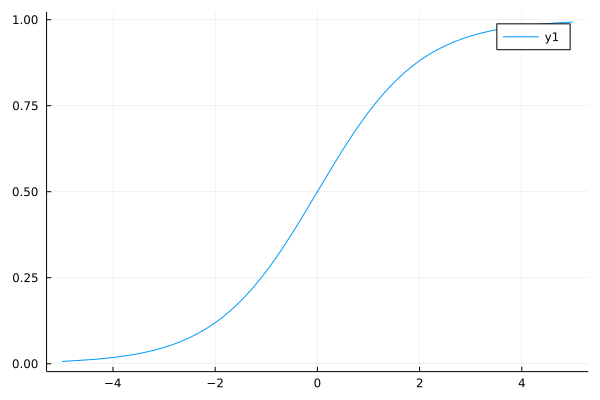

In [28]:
plot(σ, -5, 5)

In [69]:
 model = Dense(2, 2, σ)

Dense(2 => 2, σ)    # 6 parameters

In [70]:
model

Dense(2 => 2, σ)    # 6 parameters

In [71]:
typeof(model)

Dense{typeof(σ), Matrix{Float32}, Vector{Float32}}

In [83]:
x = rand(2)

2-element Vector{Float64}:
 0.18505533032649124
 0.1012435798401129

In [84]:
model(x) 

2-element Vector{Float64}:
 0.4322717444049653
 0.5080802611387616

In [87]:
σ.(model.weight*x+model.bias)

2-element Vector{Float64}:
 0.4322717444049654
 0.5080802611387616

In [89]:
methods(Flux.mse)

# 1 method for generic function "mse":
[1] mse(ŷ, y; agg) in Flux.Losses at /home/sathvik/.julia/packages/Flux/18YZE/src/losses/functions.jl:45

In [104]:
x1 = rand(1:10, 400);
x2 = rand(5:15, 400);
x = [x1; x2]
y = [fill(0, size(x1)); fill(1, size(x2))];

In [131]:
model = Dense(1, 1, σ)

Dense(1 => 1, σ)    # 2 parameters

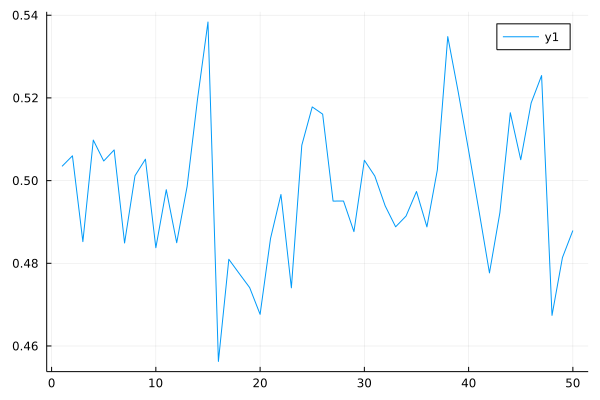

In [177]:
function trainloop()
    losses = 0
    for i in 1:size(x)[1]
        index = rand(1:size(x)[1])
        data = [x[index]]
        output = model(data)
        loss = Flux.Losses.mse(output, y[index])
        losses += loss
    end
    return losses/size(x)[1]
end
losses = []
for j in 1:50 
    push!(losses, trainloop())
end
plot(losses)

10-element Vector{Any}:
 0.51006776f0
 0.51623195f0
 0.5525135f0
 0.5001629f0
 0.4962558f0
 0.5f0
 0.49481738f0
 0.5198667f0
 0.4987639f0
 0.5067533f0